<a href="https://colab.research.google.com/github/arvindkeprate/GB-vs.-NN/blob/master/OMAE2020_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.preprocessing import StandardScaler # For Normalizing
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn import pipeline
from sklearn import ensemble
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.wrappers.scikit_learn import KerasRegressor

print (__version__) # requires version >= 1.9.0

# checking versions
print(sys.version)
pckg = [np,mpl,skl,pd,sns]
names = ["numpy:", "matplotlib:", "sklearn", "pandas:", "seaborn:"]
counter = 0
for i in pckg:
    print(names[counter], i.__version__)
    counter = counter+1

4.1.1
3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
numpy: 1.17.4
matplotlib: 3.1.2
sklearn 0.21.3
pandas: 0.25.3
seaborn: 0.9.0


In [0]:
%matplotlib inline 
#%matplotlib widget 
mpl.rc('figure', dpi=150) 

In [0]:
raw_data = pd.read_csv(r"OMAEFS.csv", delimiter=';')

In [5]:
col_names = raw_data.columns
#print(col_names)
c_names = col_names.tolist()
print(len(c_names))

21


## 10 Feature Analyses

In [7]:
colss = ["Mo (%)", 'dB', 'dC', 'NT', 'THT', 'THQCr', 'THt', 'Tt', 'TCr',"Fatigue (10e7)", "RedRatio"]
#file form which 5 features and 1 S.No has been removed
raw_data = pd.read_csv(r"OMAEFS.csv", delimiter=';')
without_target_df_lessfeatures = raw_data.drop(columns = colss)
#without_target_df_lessfeatures.head()
scaler = StandardScaler() #imported from sklearn
r = scaler.fit_transform(without_target_df_lessfeatures)
normalized_data_lessfeatures = pd.DataFrame(r)
normalized_data_lessfeatures.columns = without_target_df_lessfeatures.columns
y_nonnorm = raw_data["Fatigue (10e7)"]
normalized_data_lessfeatures.head()

,TT,C (%),Si (%),Mn (%),P (%),S (%),Ni (%),Cr (%),Cu (%),dA
0,-5.260232,-2.167083,-1.392722,-1.337547,0.215444,1.192885,-0.588111,-1.236058,-1.173548,0.677107
1,-5.260232,-2.318894,-2.271962,-1.337547,-1.403389,0.378757,-0.509343,-0.998736,0.391785,1.920704
2,-5.260232,-2.167083,0.365757,-1.371228,-1.605743,0.053105,-0.576859,-1.212326,-1.173548,0.677107
3,-5.260232,-2.167083,-0.806562,-1.101776,0.417799,1.518537,-0.588111,-1.236058,-1.173548,0.366208
4,-5.260232,-2.774325,-1.978882,-1.404910,2.036632,1.192885,-0.588111,-1.236058,-0.949929,-0.255591


In [0]:
X=without_target_df_lessfeatures.iloc[:,0:10]
y=y_nonnorm.values
from sklearn.preprocessing import  MinMaxScaler
sc= MinMaxScaler()
X= sc.fit_transform(X)
y= y.reshape(-1,1)
y=sc.fit_transform(y)

In [9]:
kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=42) 

for train_index, test_index in kf.split(normalized_data_lessfeatures):
    X_train, X_test = normalized_data_lessfeatures.iloc[train_index], normalized_data_lessfeatures.iloc[test_index] 
    y_train, y_test = y_nonnorm.iloc[train_index], y_nonnorm.iloc[test_index]

X_train.shape

(334, 10)

Gradient Boosting Algorithm

In [12]:
%%time

feature_num = 10

pipe_GB = pipeline.Pipeline([
    ('gb', ensemble.GradientBoostingRegressor(learning_rate=0.05, n_estimators=1000, max_features=10))
])

pipe_GB.fit(X_train, y_train)

y_test_pred = pipe_GB.predict(X_test)

CPU times: user 377 ms, sys: 5.74 ms, total: 382 ms
Wall time: 388 ms


MLP NN Keras

In [14]:
%%time

model = Sequential()
model.add(Dense(100, input_dim=10, activation = 'sigmoid')) #with relu activation, negative r2 and EVS (200)
model.add(Dense(5))# 5
model.add(Dense(5))# 5
model.add(Dense(1, activation = 'linear')) # use softmax activation function for classification problems
model.compile(optimizer='adam', loss='mean_absolute_error',  metrics=['mean_squared_error']) 
# for classification problem we use crossentropy loss

model.fit(X_train, y_train, batch_size=2,epochs=1000, verbose = True, validation_split = 0) 
# epochs is forward and backward pass of all our training examples
# batch size is the number of training examples in one forward and backward pass

# as the batch size decreases the time for computation increases and also as the epoch increases the time of computation increases.

y_pred= model.predict(X_test)









Epoch 1/1000





334/334 [==============================] - 1s 3ms/step - loss: 443.8276 - mean_squared_error: 205217.6961
Epoch 2/1000
334/334 [==============================] - 0s 652us/step - loss: 170.3732 - mean_squared_error: 46143.0472
Epoch 3/1000
334/334 [==============================] - 0s 647us/step - loss: 46.5270 - mean_squared_error: 3426.8964
Epoch 4/1000
334/334 [==============================] - 0s 654us/step - loss: 42.5257 - mean_squared_error: 2825.1820
Epoch 5/1000
334/334 [==============================] - 0s 658us/step - loss: 39.9898 - mean_squared_error: 2502.4905
Epoch 6/1000
334/334 [==============================] - 0s 636us/step - loss: 38.3144 - mean_squared_error: 2571.7753
Epoch 7/1000
334/334 [==============================] - 0s 650us/step - loss: 37.7657 - mean_squared_error: 2560.1342
Epoch 8/1000
334/334 [==============================] - 0s 598us/step - loss: 36.1707 - mean_squared_error: 2531.9701
Epoch 9/1000
334/334 [===================

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 505       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 1,641
Trainable params: 1,641
Non-trainable params: 0
_________________________________________________________________


In [16]:
rmse_test = np.round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
print("RMSE_NN:", rmse_test)

rmse_test = np.round(np.sqrt(mean_squared_error(y_test, y_test_pred)),3)
print("RMSE_GB:", rmse_test)

r2_test = np.round(r2_score(y_test, y_pred),3)
print("r2_test_NN:", r2_test)

r2_test = np.round(r2_score(y_test, y_test_pred),3)
print("r2_test_GB:", r2_test)

MAE_test = np.round(mean_absolute_error(y_test, y_pred),3)
print("MAE_NN:", MAE_test)

MAE_test = np.round(mean_absolute_error(y_test, y_test_pred),3)
print("MAE_GB:", MAE_test)

MedianAE_test = np.round(median_absolute_error(y_test, y_pred),3)
print("MedianAE_test_NN:", MedianAE_test)

MedianAE_test = np.round(median_absolute_error(y_test, y_test_pred),3)
print("MedianAE_test_GB:", MedianAE_test)

EVS_test = np.round(explained_variance_score(y_test, y_pred),3)
print("EVS_NN:", EVS_test)

EVS_test = np.round(explained_variance_score(y_test, y_test_pred),3)
print("EVS_GB:", EVS_test)

RMSE_NN: 15.205
RMSE_GB: 11.927
r2_test_NN: 0.944
r2_test_GB: 0.966
MAE_NN: 12.677
MAE_GB: 9.715
MedianAE_test_NN: 10.154
MedianAE_test_GB: 8.051
EVS_NN: 0.944
EVS_GB: 0.966


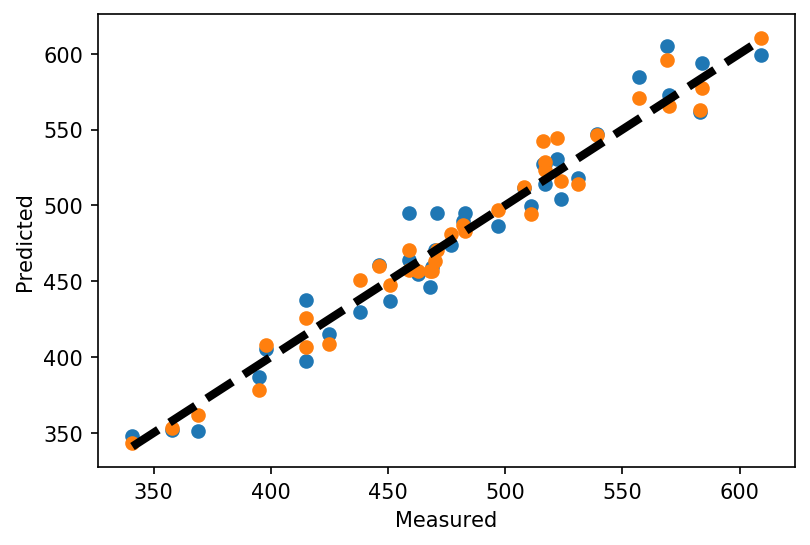

In [17]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.scatter(y_test, y_test_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## **18 Feature Ananlyses**

In [0]:
raw_data = pd.read_csv(r"OMAEFS.csv", delimiter=';')
collls = ['Tt', 'TCr', "Fatigue (10e7)"]
without_target_df = raw_data.drop(columns = collls)
scaler = StandardScaler() #imported from sklearn
r = scaler.fit_transform(without_target_df)
normalized_data = pd.DataFrame(r)
normalized_data.columns = without_target_df.columns
pd.set_option('display.max_columns', None)
y_nonnorm = raw_data["Fatigue (10e7)"]
normalized_data.head()

kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=42) 

for train_index, test_index in kf.split(normalized_data):
    #print("Train Index:", len(train_index)) 
    #print("Validation Index:", len(test_index))
    X_train, X_test = normalized_data.iloc[train_index], normalized_data.iloc[test_index] 
    y_train, y_test = y_nonnorm.iloc[train_index], y_nonnorm.iloc[test_index]

In [20]:
%%time

feature_num = 18

pipe_GB = pipeline.Pipeline([
    ('gb', ensemble.GradientBoostingRegressor(learning_rate=0.05, n_estimators=1000, max_features=18))
])

pipe_GB.fit(X_train, y_train)

y_test_pred = pipe_GB.predict(X_test)



CPU times: user 420 ms, sys: 1.38 ms, total: 421 ms
Wall time: 424 ms


In [21]:
%%time
# NN
model = Sequential()
model.add(Dense(100, input_dim=18, activation = 'sigmoid')) #with relu activation, negative r2 and EVS (200)
model.add(Dense(5))# 5
model.add(Dense(5))# 5
model.add(Dense(1, activation = 'linear')) # use softmax activation function for classification problems
model.compile(optimizer='adam', loss='mean_absolute_error',  metrics=['mean_squared_error']) 
# for classification problem we use crossentropy loss

model.fit(X_train, y_train, batch_size=2,epochs=1000, verbose = True, validation_split = 0) 
# epochs is forward and backward pass of all our training examples
# batch size is the number of training examples in one forward and backward pass

# as the batch size decreases the time for computation increases and also as the epoch increases the time of computation increases.

y_pred= model.predict(X_test)
#predicted_MLP.append(y_pred)

Epoch 1/1000
334/334 [==============================] - 1s 2ms/step - loss: 446.0509 - mean_squared_error: 206820.6226
Epoch 2/1000
334/334 [==============================] - 0s 660us/step - loss: 176.1621 - mean_squared_error: 49523.9048
Epoch 3/1000
334/334 [==============================] - 0s 701us/step - loss: 38.6857 - mean_squared_error: 2217.4090
Epoch 4/1000
334/334 [==============================] - 0s 673us/step - loss: 32.4385 - mean_squared_error: 1556.4905
Epoch 5/1000
334/334 [==============================] - 0s 682us/step - loss: 28.2114 - mean_squared_error: 1200.8538
Epoch 6/1000
334/334 [==============================] - 0s 678us/step - loss: 24.4288 - mean_squared_error: 889.6145
Epoch 7/1000
334/334 [==============================] - 0s 694us/step - loss: 21.7726 - mean_squared_error: 752.2509
Epoch 8/1000
334/334 [==============================] - 0s 674us/step - loss: 19.3141 - mean_squared_error: 602.4739
Epoch 9/1000
334/334 [==============================] - 

In [22]:
rmse_test = np.round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
print("RMSE_NN:", rmse_test)

rmse_test = np.round(np.sqrt(mean_squared_error(y_test, y_test_pred)),3)
print("RMSE_GB:", rmse_test)

r2_test = np.round(r2_score(y_test, y_pred),3)
print("r2_test_NN:", r2_test)

r2_test = np.round(r2_score(y_test, y_test_pred),3)
print("r2_test_GB:", r2_test)

MAE_test = np.round(mean_absolute_error(y_test, y_pred),3)
print("MAE_NN:", MAE_test)

MAE_test = np.round(mean_absolute_error(y_test, y_test_pred),3)
print("MAE_GB:", MAE_test)

MedianAE_test = np.round(median_absolute_error(y_test, y_pred),3)
print("MedianAE_test_NN:", MedianAE_test)

MedianAE_test = np.round(median_absolute_error(y_test, y_test_pred),3)
print("MedianAE_test_GB:", MedianAE_test)

EVS_test = np.round(explained_variance_score(y_test, y_pred),3)
print("EVS_NN:", EVS_test)

EVS_test = np.round(explained_variance_score(y_test, y_test_pred),3)
print("EVS_GB:", EVS_test)

RMSE_NN: 16.792
RMSE_GB: 13.838
r2_test_NN: 0.932
r2_test_GB: 0.954
MAE_NN: 12.529
MAE_GB: 10.95
MedianAE_test_NN: 9.854
MedianAE_test_GB: 8.82
EVS_NN: 0.934
EVS_GB: 0.954


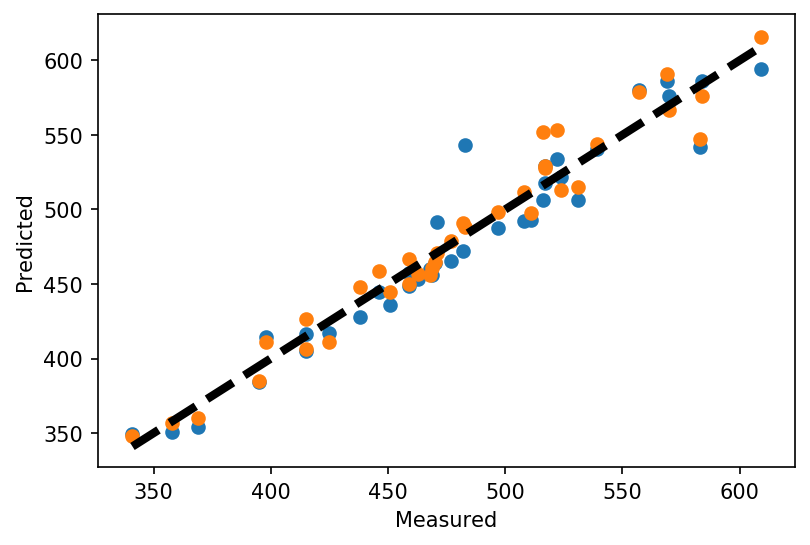

In [23]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.scatter(y_test, y_test_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()